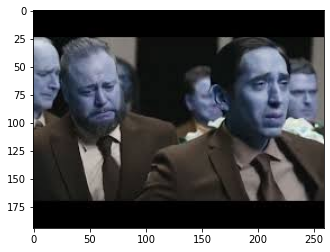

In [4]:
#Basic Application of image processing is facial identification.
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('gopro.jpeg')
plt.imshow(img)
plt.show()

                                 '''Now for Medical Image Analysis.'''

In [7]:
#we need libraries..  
import numpy as np                              # numerical arrangements for suitable data processing
import cv2                                      # computervision
import matplotlib.pyplot as plt                 # plotting the data
import pydicom as pdicom                        # working on DICOM format which is the format of medical images
import os                                       # accesing amd working on path of the data imported
import glob                                     # mapping the images
%matplotlib inline


In [8]:
import pandas as pd                                                  #reading the dataset
import scipy.ndimage                                                 # image data extraction
from skimage import measure, morphology                              # customising the data with sklear_image
from mpl_toolkits.mplot3d.art3d import Poly3DCollection              # tools for 3D visualization as .dcm images are MRI scanned images.

In [10]:
#importing the dicom images folder
input_fold= 'dicomimages/series-000001/'
patients=os.listdir(input_fold)                   
patients.sort()

In [14]:
#creating an empty dictionary to put the imported dicom image folder with it's dicom image data and metadata.
dcmfile=[]
def load_scan2(path):
    for dname,subdlist,filelist in os.walk(path):
        for fname in filelist:
            if ".dcm" in fname.lower():
                dcmfile.append(os.path.join(dname,fname))
    return dcmfile
patient1 = load_scan2(input_fold)
#print(patient1)

In [16]:
#reading single image from the dictionary we created and managaing the pixels according to the image data and metadata.
refds= pdicom.read_file(dcmfile[0])

constantpixeldim = (int(refds.Rows), int(refds.Columns), len(dcmfile))

constantpixelspacing = (float(refds.PixelSpacing[0]), 
                        float(refds.PixelSpacing[1]),
                        float(refds.SliceThickness))


In [17]:
#getting the image ready for 3D plotting visualization.
x= np.arange(0.0, (constantpixeldim[0]+1)*constantpixelspacing[0], constantpixelspacing[0])
y= np.arange(0.0, (constantpixeldim[1]+1)*constantpixelspacing[1], constantpixelspacing[1])
z= np.arange(0.0, (constantpixeldim[2]+1)*constantpixelspacing[2], constantpixelspacing[2])

In [19]:
# creating the dicomarray to manage the pixel array for each data member of the dictionary.
dicomArray= np.zeros(constantpixeldim, dtype=refds.pixel_array.dtype)

for fnamedcm in dcmfile:
    
    ds= pdicom.read_file(fnamedcm)
    dicomArray[:,:, dcmfile.index(fnamedcm)] = ds.pixel_array

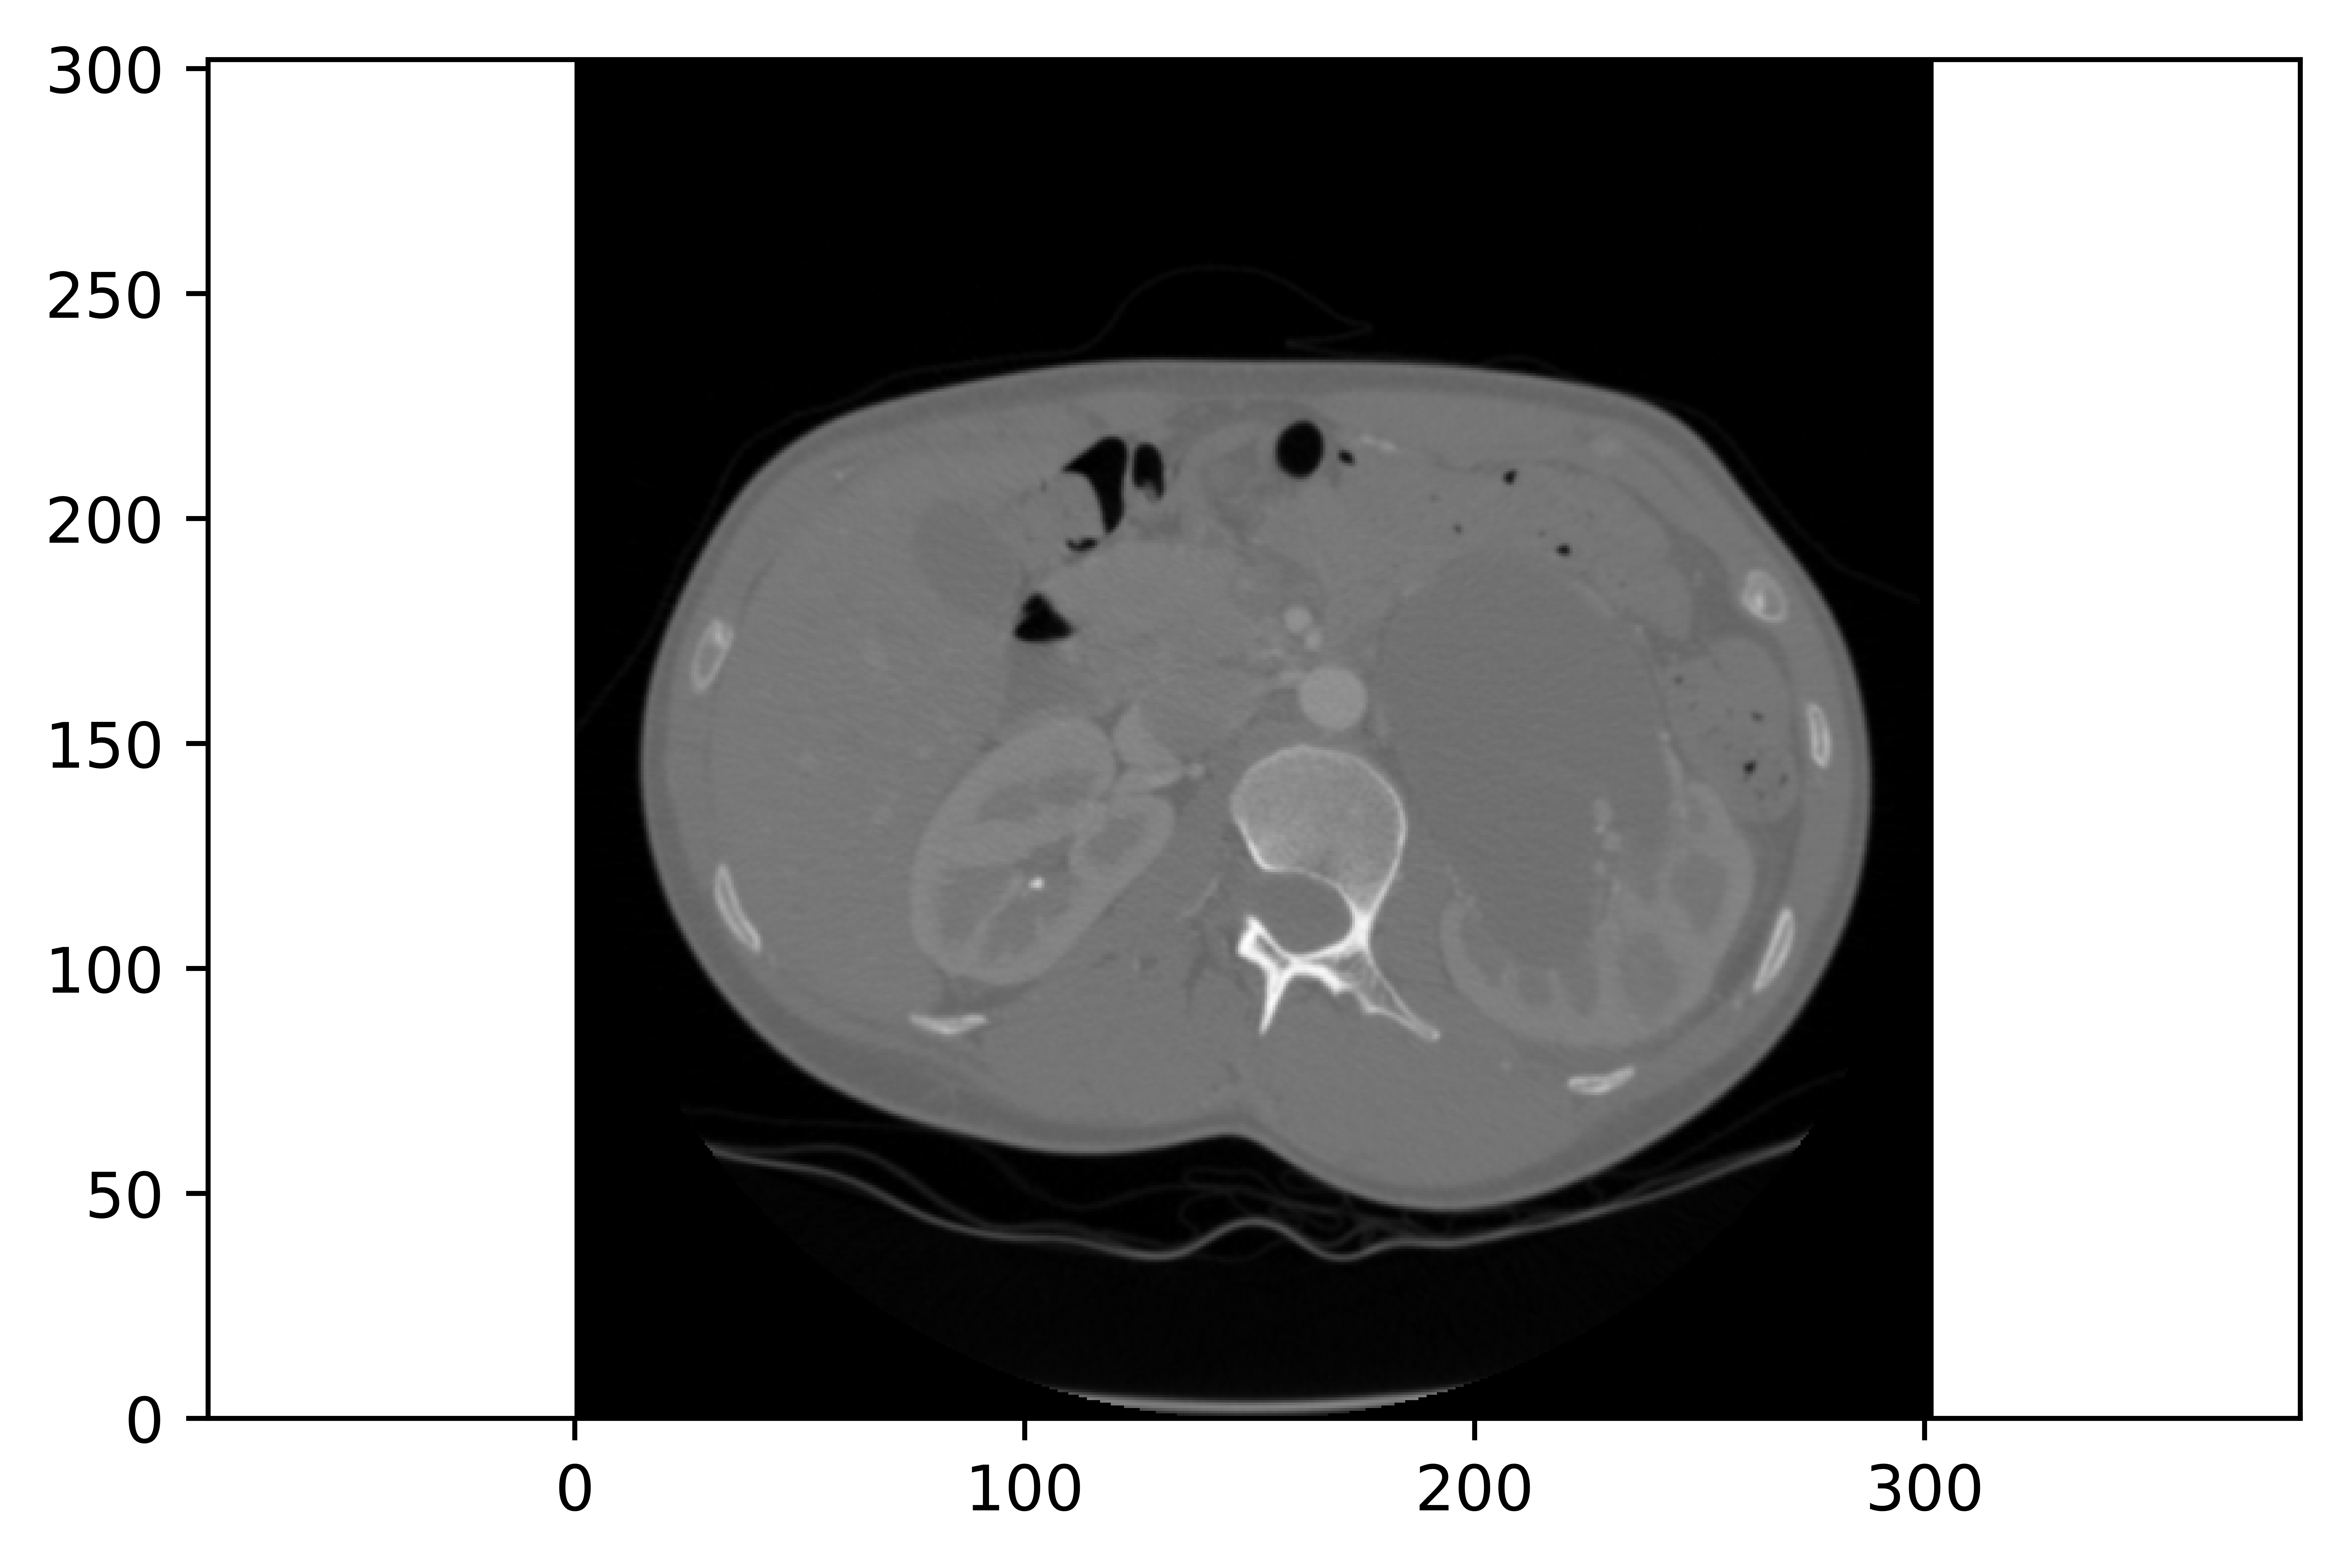

In [21]:
# finally plotting the dicom image with Quadmesh for 3D visual.
plt.figure(dpi=1600)
plt.axes().set_aspect('equal','datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(dicomArray[:,:,120]))

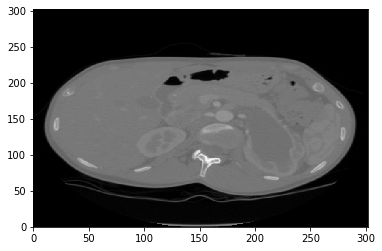

In [22]:
plt.pcolormesh(x, y, np.flipud(dicomArray[:,:,80]))

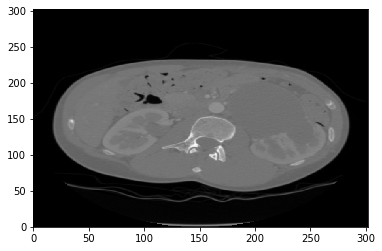

In [23]:
plt.pcolormesh(x, y, np.flipud(dicomArray[:,:,160]))

''' The Above was example of how Soft Computing can be used in Biomedical Sciences for Brain MRI scan reports and tumor detection '''

In [26]:
# In need of Libraries..
import requests                  # requesting url for data access.
import zipfile                   # to unzip the data file.
import pandas as pd              # putting data in dataframes.
import numpy as np               # numerical arrangement of the data
import os                        # accesing and working on path of the data imported
import nibabel                   # reading data of image with acquisitional parameters of the same.
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter Notebook
%matplotlib inline

In [38]:
# the URL of the data downloading using the Requests library
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.zip'
data = requests.get(url)

# Check if the target folder for storing the data already exists. If not create it and save the zip file.
if os.path.exists('./fMRI_data') == False:
    os.mkdir('fMRI_data')
    
open('./fMRI_data/data.zip', 'wb').write(data.content)

# Unzip the file
zip_ref = zipfile.ZipFile('./fMRI_data/data.zip', 'r')
zip_ref.extractall('./fMRI_data/')
zip_ref.close()

In [39]:

# Find all files in the structural data folder
data_path = './fMRI_data/sM00223/'
files = os.listdir(data_path)

# Read in the data
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()
print(data.shape)

(256, 256, 54, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.


In [40]:
# mapping the shape of data for 3D
data = np.rot90(data.squeeze(), 1)
print(data.shape)

(256, 256, 54)


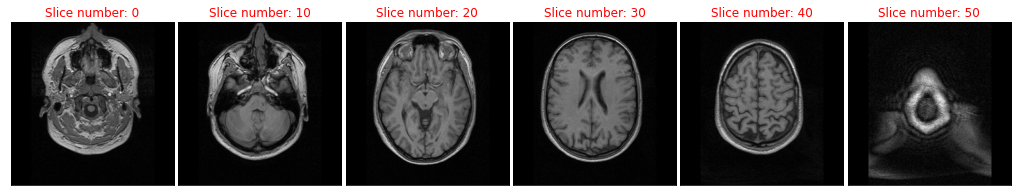

In [41]:
#plotting the image with different slices in the data for distinctive insight of the image.

fig, ax = plt.subplots(1, 6, figsize=[18, 3])

n = 0
slice = 0
for _ in range(6):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 10
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [42]:
x_size = 64
y_size = 64
n_slice = 64
n_volumes = 96

# Find all files in the data folder
data_path = './fMRI_data/fM00223/'
files = os.listdir(data_path)

# Read in the data and organize it with respect to the acquisition parameters
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()        
        data_all.append(data.reshape(x_size, y_size, n_slice))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.as

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.as

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.as

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.as

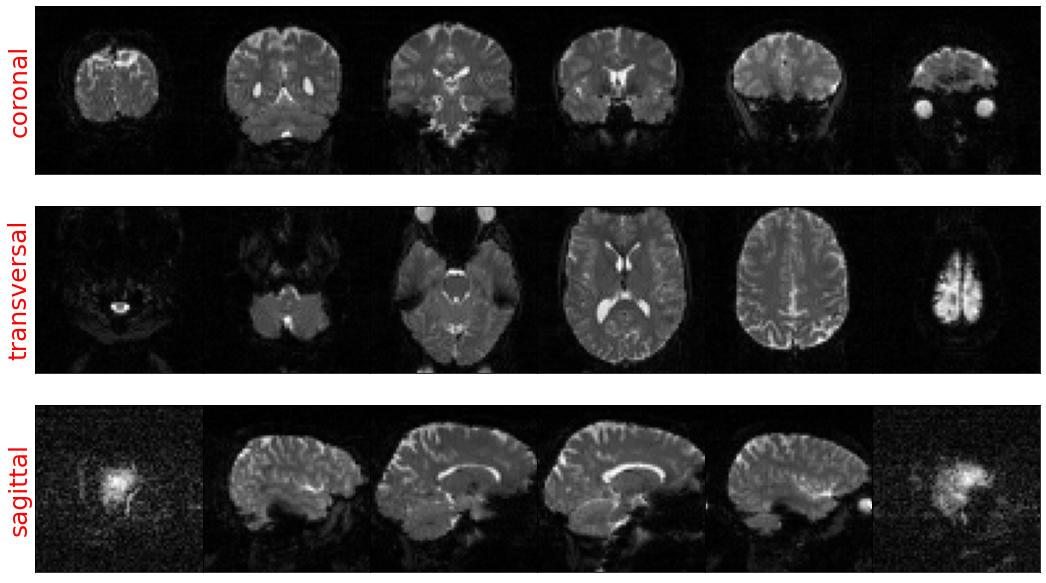

In [43]:
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(data_all, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(data_all, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(data_all, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 10
n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 10

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()    

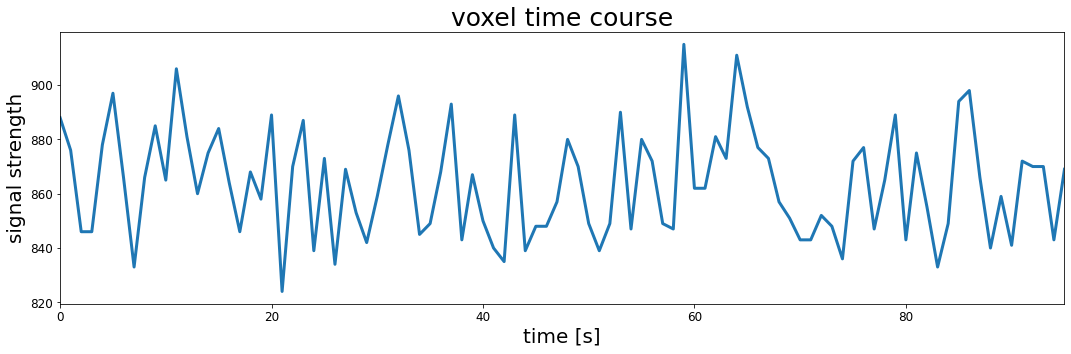

In [44]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot the timecourse of a random voxel
ax.plot(transversal[30, 30, 35, :], lw=3)
ax.set_xlim([0, transversal.shape[3]-1])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

''' This is voxel signal strength a perfect example of how we can predict the brain impulses from the MRI images. '''